# Thématique 6 - Le Clustering

### Importation des librairies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Algorithme des K-means

In [3]:
from sklearn.cluster import KMeans

# Initialisation de varibales
x = [1, 2, 9, 12, 20]                           # Points
k = [2, 2, 3]                                   # Nombre de clusters
g = [[[1], [20]], [[2], [9]], [[1], [9], [12]]] # Centres de gravité

for i in range(len(g)):
    # Préparation des données
    x = np.array(x).reshape(-1, 1)
    g_centers = np.array(g[i])

    # k-means avec 2 clusters
    kmeans = KMeans(n_clusters=k[i], init=g_centers, n_init=1, max_iter=100, random_state=0)
    kmeans.fit(x)

    # Centres finaux
    centers = kmeans.cluster_centers_

    # Calcul de l'inertie totale et intra-cluster
    inertie_intra = kmeans.inertia_                # Inertie intra-cluster
    inertie_totale = np.sum((x - np.mean(x)) ** 2) # Inertie totale
    inertie_inter = inertie_totale - inertie_intra # Inertie inter-cluster

    # Calcul du pourcentage d'inertie expliquée
    inertie_expliquee = 1 - (inertie_intra / inertie_totale)

    # Afficher les résultats
    print(f"Cas {i+1} :\n")
    print("Clusters:", kmeans.labels_)
    print("Centre de gravité :", np.mean(x))
    print("Centres finaux:", centers.flatten())
    print("Inertie totale:", inertie_totale)
    print("Inertie inter-cluster:", inertie_inter)
    print(f"Pourcentage d'inertie expliquée : {round(inertie_expliquee * 100, 2)}%")
    print()
    print(f"L'algorithme des k-means a partitionné les points en {k[i]} clusters :")
    for j in range(k[i]):
        # Extraction des valeurs associées au cluster i
        cluster_points = x[kmeans.labels_ == j].flatten()
        center_value = int(centers[j]) if centers[j] % 1 == 0 else float(centers[j])
        print(f"  - Cluster {j} : {cluster_points} avec un centre de gravité final de {center_value}.")
    print()
    print(f"Le pourcentage d'inertie expliquée par cette partition est d'environ {round(inertie_expliquee * 100, 2)}%.")
    print(f"Cela signifie que cette partition explique {round(inertie_expliquee * 100, 2)}% de la variance totale des données.")
    print()

Cas 1 :

Clusters: [0 0 0 1 1]
Centre de gravité : 8.8
Centres finaux: [ 4. 16.]
Inertie totale: 242.8
Inertie inter-cluster: 172.8
Pourcentage d'inertie expliquée : 71.17%

L'algorithme des k-means a partitionné les points en deux clusters :
  - Cluster 0 : [1 2 9] avec un centre de gravité final de 4.
  - Cluster 1 : [12 20] avec un centre de gravité final de 16.

Le pourcentage d'inertie expliquée par cette partition est d'environ 71.17%.
Cela signifie que cette partition explique 71.17% de la variance totale des données.

Cas 2 :

Clusters: [0 0 1 1 1]
Centre de gravité : 8.8
Centres finaux: [ 1.5        13.66666667]
Inertie totale: 242.8
Inertie inter-cluster: 177.63333333333333
Pourcentage d'inertie expliquée : 73.16%

L'algorithme des k-means a partitionné les points en deux clusters :
  - Cluster 0 : [1 2] avec un centre de gravité final de 1.5.
  - Cluster 1 : [ 9 12 20] avec un centre de gravité final de 13.666666666666666.

Le pourcentage d'inertie expliquée par cette partit

Peut-on utiliser l’inertie inter-classes pour déterminer le meilleur regroupement des deux?

Le critère permet de départager les deux partitions à 2 classes, la meilleure étant la première. En revanche, il ne peut 
pas être utilisé pour comparer des partitions n’ayant pas le même nombre de classes. En effet, plus le nombre de classes 
augmente, plus le pourcentage d’inertie expliquée augmente. Le cas extrême est un nombre de classes égal au nombre 
d’individus et dans ce cas le pourcentage d’inertie expliquée est 100% (cf. formule de l’inertie intra = 0). Et pourtant, ce 
partitionnement n’est pas souhaitable. Il faut donc trouver un compromis entre un pourcentage élevé et un nombre de 
classes faible.

## Algorithme de Classification Hiérarchique Ascendante (CAH)

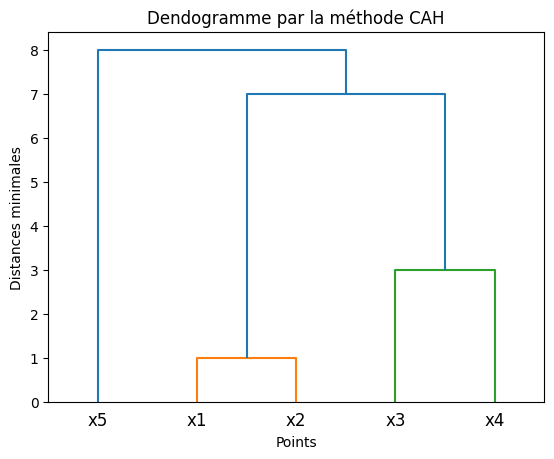

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Matrice des liens
Z = linkage(x, method='single', metric='euclidean')

# Création d'étiquettes
labels = [f'x{i+1}' for i in range(len(x))]

# Affichage du dendrogramme
plt.title("Dendogramme par la méthode CAH")
dendrogram(Z, labels=labels)
plt.xlabel('Points')
plt.ylabel('Distances minimales')
plt.show()

L'algorithme CAH propose deux splits : 
  - (1) : {x1, x2} et {x3, x4, x5}
  - (2) : {x1, x2}, {x3, x4} et {x5}
  - (3) : {x1, x2, x3, x4} et {x5}

Le meilleur split est le (2) car malgré tout, les deux clusters ont une distance minimale assez faible, ce qui permet de garder le split (2). Raison pour laquelle (3) n'est pas envisageable, la distance minimale est bien trop élevée.